In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=59016a4301f30a855fe05b5ee285cb53252f1bd5e1225b0578d14d813c834285
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Colab")\
        .getOrCreate()

In [ ]:
spark

In [ ]:

df  = spark.read.csv("cardio.csv", header=True, inferSchema=True)


In [ ]:
df.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [ ]:
import pyspark.sql.functions as F
# Count the number of males and females
gender_count = df.groupBy("gender").agg(F.count("*").alias("count"))

# Count the number of males and females with heart disease
heart_disease_count = df.filter("cardio = 1").groupBy("gender").agg(F.count("*").alias("count_with_heart_disease"))

# Show the results
gender_count.show()
heart_disease_count.show()

+------+-----+
|gender|count|
+------+-----+
|     1|45530|
|     2|24470|
+------+-----+

+------+------------------------+
|gender|count_with_heart_disease|
+------+------------------------+
|     1|                   22616|
|     2|                   12363|
+------+------------------------+



In [ ]:
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|summary|                id|               age|             gender|            height|            weight|            ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|            cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|  count|             70000|             70000|              70000|             70000|             70000|            70000|             70000|             70000|             70000|              70000|               70000

In [ ]:
columns = ["id", "age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]


In [ ]:
# Count of unique values in the 'gender' column
df.groupBy("gender").count().show()


+------+-----+
|gender|count|
+------+-----+
|     1|45530|
|     2|24470|
+------+-----+



In [ ]:
# Correlation between 'age' and 'cholesterol'
df.corr("age", "cholesterol")

# Cross-tabulation between 'cardio' and 'smoke'
df.crosstab("cardio", "smoke").show()



+------------+-----+----+
|cardio_smoke|    0|   1|
+------------+-----+----+
|           0|31781|3240|
|           1|32050|2929|
+------------+-----+----+



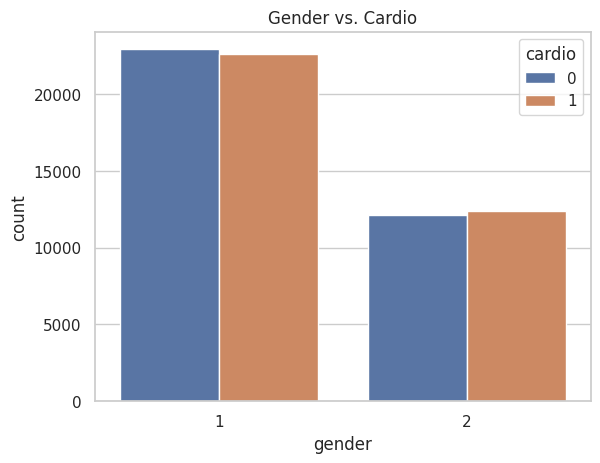

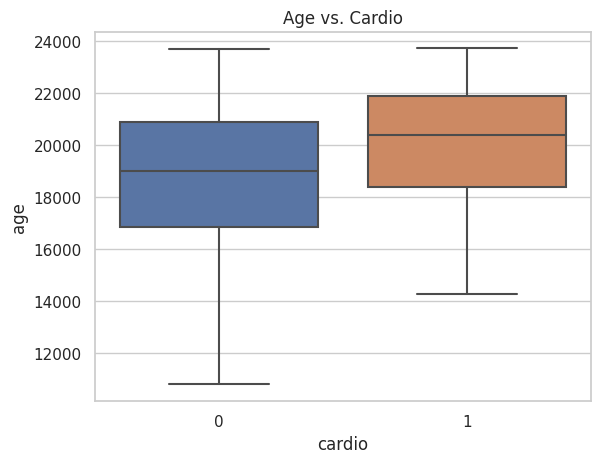

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
df_pd = df.toPandas()

# Set the style for Seaborn plots (optional but improves aesthetics)
sns.set(style="whitegrid")

# Visualize "cardio" against different features

# 1. Gender vs. Cardio
sns.countplot(x="gender", hue="cardio", data=df_pd)
plt.title("Gender vs. Cardio")
plt.show()

# 2. Age vs. Cardio
sns.boxplot(x="cardio", y="age", data=df_pd)
plt.title("Age vs. Cardio")
plt.show()




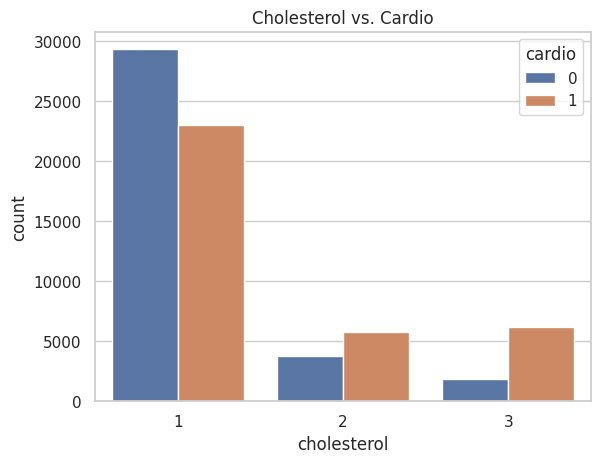

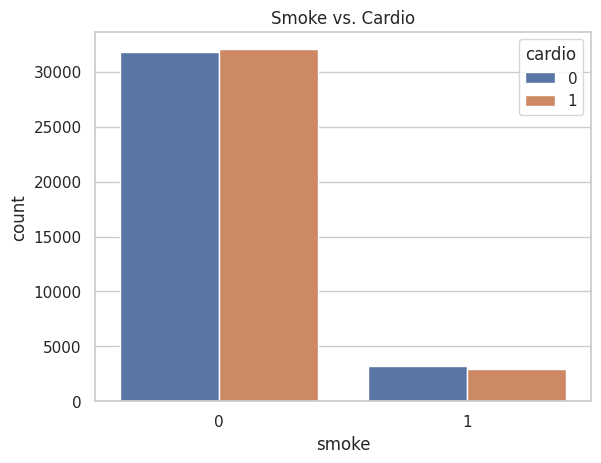

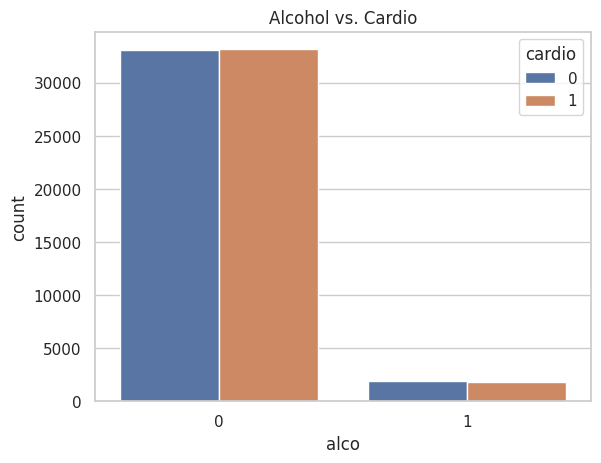

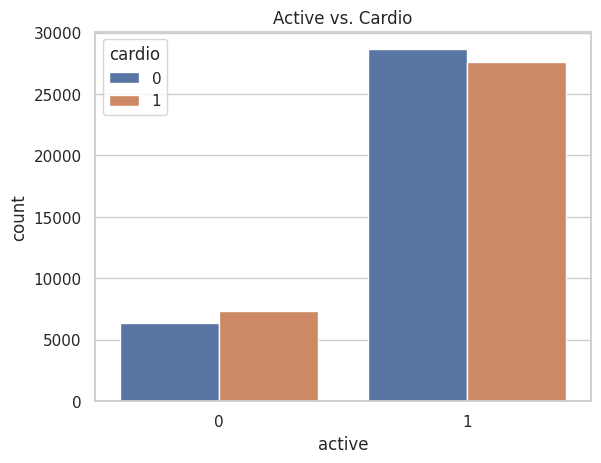

In [ ]:
# 3. Cholesterol vs. Cardio
sns.countplot(x="cholesterol", hue="cardio", data=df_pd)
plt.title("Cholesterol vs. Cardio")
plt.show()

# 4. Smoke vs. Cardio
sns.countplot(x="smoke", hue="cardio", data=df_pd)
plt.title("Smoke vs. Cardio")
plt.show()

# 5. Alcohol vs. Cardio
sns.countplot(x="alco", hue="cardio", data=df_pd)
plt.title("Alcohol vs. Cardio")
plt.show()

# 6. Active vs. Cardio
sns.countplot(x="active", hue="cardio", data=df_pd)
plt.title("Active vs. Cardio")
plt.show()

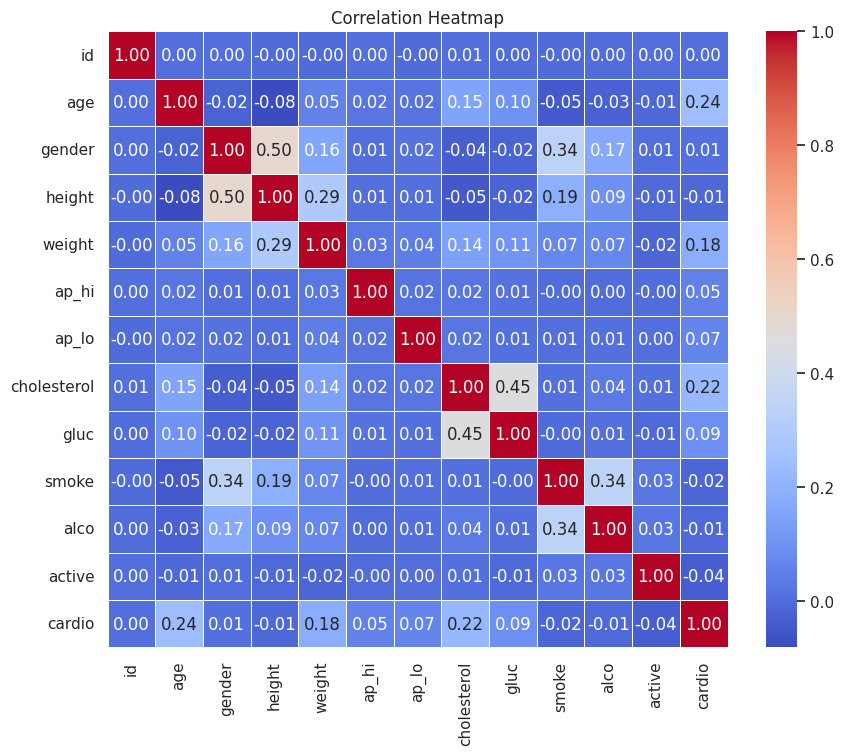

In [ ]:

# Calculate the correlation matrix for your features
correlation_matrix = df_pd.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

In [ ]:
# Print correlation matrix
correlation_matrix = df_pd.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardi

In [ ]:
from pyspark.sql import functions as F


In [ ]:

# Check for missing values in each column
missing_counts = df.agg(*[F.sum(F.when(F.isnull(c), 1).otherwise(0)).alias(c) for c in df.columns])

# Show the count of missing values in each column
missing_counts.show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [ ]:
# Replace missing values with the mean for numerical columns and mode for categorical columns
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Replace missing values in numerical columns with the mean
for column in numerical_columns:
    mean_value = df.select(F.mean(column)).collect()[0][0]
    df = df.withColumn(column, F.when(F.isnull(column), mean_value).otherwise(F.col(column)))

# Replace missing values in categorical columns with mode
for column in categorical_columns:
    mode_value = df.groupBy(column).count().orderBy(F.desc("count")).select(column).first()[0]
    df = df.withColumn(column, F.when(F.isnull(column), mode_value).otherwise(F.col(column)))


In [ ]:
# Example: Calculate the average "age" for each gender
df.groupBy("gender").agg(F.mean("age").alias("avg_age")).show()

+------+------------------+
|gender|           avg_age|
+------+------------------+
|     1|19510.124577201845|
|     2| 19392.09787494892|
+------+------------------+



In [ ]:
from pyspark.sql.functions import col

# Create a new column "age_in_years" by dividing "age" by 365
df = df.withColumn("age_in_years", (col("age") / 365).cast("int"))

# Show the DataFrame with the new "age_in_years" column
df.show()


+---+-------+------+------+------+-----+-----+-----------+----+-----+----+------+------+------------+
| id|    age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|age_in_years|
+---+-------+------+------+------+-----+-----+-----------+----+-----+----+------+------+------------+
|  0|18393.0|     2| 168.0|  62.0|110.0| 80.0|          1|   1|    0|   0|     1|     0|          50|
|  1|20228.0|     1| 156.0|  85.0|140.0| 90.0|          3|   1|    0|   0|     1|     1|          55|
|  2|18857.0|     1| 165.0|  64.0|130.0| 70.0|          3|   1|    0|   0|     0|     1|          51|
|  3|17623.0|     2| 169.0|  82.0|150.0|100.0|          1|   1|    0|   0|     1|     1|          48|
|  4|17474.0|     1| 156.0|  56.0|100.0| 60.0|          1|   1|    0|   0|     0|     0|          47|
|  8|21914.0|     1| 151.0|  67.0|120.0| 80.0|          2|   2|    0|   0|     0|     0|          60|
|  9|22113.0|     1| 157.0|  93.0|130.0| 80.0|          3|   1|    0|   0|     1| 

In [ ]:
# Example: Calculate the average "age" for each gender
df.groupBy("gender").agg(F.mean("age_in_years").alias("avg_age")).show()

+------+------------------+
|gender|           avg_age|
+------+------------------+
|     1| 52.95433779925324|
|     2|52.629178586023706|
+------+------------------+



In [ ]:
from pyspark.sql.functions import when, col
from pyspark.sql.window import Window

# Calculate IQR for numerical columns
for column in numerical_columns:
    quartiles = df.approxQuantile(column, [0.25, 0.75], 0.05)
    iqr = quartiles[1] - quartiles[0]
    lower_bound = quartiles[0] - 1.5 * iqr
    upper_bound = quartiles[1] + 1.5 * iqr
    df = df.withColumn(column, when((col(column) < lower_bound) | (col(column) > upper_bound), None).otherwise(col(column)))

# Remove rows with missing values
df = df.na.drop()


In [ ]:
df.show()

+---+-------+------+------+------+-----+-----+-----------+----+-----+----+------+------+------------+
| id|    age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|age_in_years|
+---+-------+------+------+------+-----+-----+-----------+----+-----+----+------+------+------------+
|  0|18393.0|     2| 168.0|  62.0|110.0| 80.0|          1|   1|    0|   0|     1|     0|          50|
|  1|20228.0|     1| 156.0|  85.0|140.0| 90.0|          3|   1|    0|   0|     1|     1|          55|
|  2|18857.0|     1| 165.0|  64.0|130.0| 70.0|          3|   1|    0|   0|     0|     1|          51|
|  8|21914.0|     1| 151.0|  67.0|120.0| 80.0|          2|   2|    0|   0|     0|     0|          60|
|  9|22113.0|     1| 157.0|  93.0|130.0| 80.0|          3|   1|    0|   0|     1|     0|          60|
| 12|22584.0|     2| 178.0|  95.0|130.0| 90.0|          3|   3|    0|   0|     1|     1|          61|
| 13|17668.0|     1| 158.0|  71.0|110.0| 70.0|          1|   1|    0|   0|     1| 

In [ ]:
# Calculate the number of rows in the DataFrame
row_count = df.count()

# Print the number of rows
print("Number of rows in the DataFrame: ", row_count)


Number of rows in the DataFrame:  52405


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Data preprocessing
# (Assuming you have already handled missing values and outliers)

# Feature vector assembly
feature_columns = ["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)



In [ ]:
# Initialize regression models
linear_regression = LinearRegression(featuresCol="features", labelCol="cardio")
random_forest = RandomForestRegressor(featuresCol="features", labelCol="cardio")

# Train the models
linear_model = linear_regression.fit(train_data)
rf_model = random_forest.fit(train_data)

# Make predictions on the test data
linear_predictions = linear_model.transform(test_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate model performance
evaluator = RegressionEvaluator(labelCol="cardio", predictionCol="prediction", metricName="mse")
linear_mse = evaluator.evaluate(linear_predictions)
rf_mse = evaluator.evaluate(rf_predictions)

print("Linear Regression Mean Squared Error (MSE):", linear_mse)
print("Random Forest Mean Squared Error (MSE):", rf_mse)


Linear Regression Mean Squared Error (MSE): 0.20270387880202723
Random Forest Mean Squared Error (MSE): 0.19922483534423877


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np
import matplotlib.pyplot as plt

# Calculate RMSE for Linear Regression
linear_evaluator = RegressionEvaluator(labelCol="cardio", predictionCol="prediction", metricName="rmse")
linear_rmse = linear_evaluator.evaluate(linear_predictions)
print("Linear Regression RMSE:", linear_rmse)

# Calculate RMSE for Random Forest
rf_evaluator = RegressionEvaluator(labelCol="cardio", predictionCol="prediction", metricName="rmse")
rf_rmse = rf_evaluator.evaluate(rf_predictions)
print("Random Forest RMSE:", rf_rmse)


Linear Regression RMSE: 0.45022647501232893
Random Forest RMSE: 0.4463460936809448


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize the Logistic Regression Classifier
lr = LogisticRegression(featuresCol="features", labelCol="cardio")

# Train the Logistic Regression model
lr_model = lr.fit(train_data)

# Make predictions on the test data
lr_predictions = lr_model.transform(test_data)

# Evaluate the Logistic Regression model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)
print("Logistic Regression Classifier Accuracy:", accuracy)

evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(lr_predictions)
print("Logistic Regression Classifier Precision:", precision)

evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(lr_predictions)
print("Logistic Regression Classifier Recall:", recall)

evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(lr_predictions)
print("Logistic Regression Classifier F1-score:", f1)


Logistic Regression Classifier Accuracy: 0.6935896221948679
Logistic Regression Classifier Precision: 0.6933360292876198
Logistic Regression Classifier Recall: 0.6935896221948679
Logistic Regression Classifier F1-score: 0.6896897553646023


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")

# Train the Decision Tree model
dt_model = dt.fit(train_data)

# Make predictions on the test data
dt_predictions = dt_model.transform(test_data)

# Evaluate the Decision Tree model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(dt_predictions)
print("Decision Tree Classifier Accuracy:", accuracy)


Decision Tree Classifier Accuracy: 0.7039106145251397


In [ ]:
from pyspark.ml.classification import GBTClassifier

# Initialize the GBT Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="cardio")

# Train the GBT model
gbt_model = gbt.fit(train_data)

# Make predictions on the test data
gbt_predictions = gbt_model.transform(test_data)

# Evaluate the GBT model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(gbt_predictions)
print("GBT Classifier Accuracy:", accuracy)


GBT Classifier Accuracy: 0.7011646624372692


In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")

# Train the Random Forest model
rf_model = rf.fit(train_data)

# Make predictions on the test data
rf_predictions = rf_model.transform(test_data)

# Evaluate the Random Forest model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(rf_predictions)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.6923586781554777


In [ ]:

# Evaluate each classifier
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")

# Decision Tree
dt_accuracy = evaluator.evaluate(dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

# GBT
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print("GBT Classifier Accuracy:", gbt_accuracy)

# Random Forest
rf_accuracy = evaluator.evaluate(rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Decision Tree Classifier Accuracy: 0.7039106145251397
GBT Classifier Accuracy: 0.7011646624372692
Random Forest Classifier Accuracy: 0.6923586781554777


In [ ]:
# Decision Tree
dt_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()
dt_predicted_labels = dt_predictions.select("prediction").rdd.flatMap(lambda x: x).collect


In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


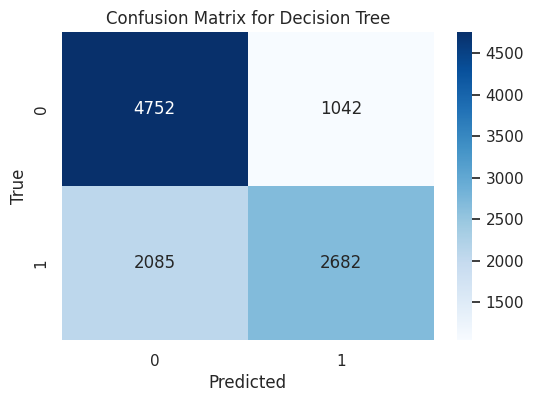

In [ ]:

# Confusion Matrix for Decision Tree
dt_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()
dt_predicted_labels = dt_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

cm_dt = confusion_matrix(dt_true_labels, dt_predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

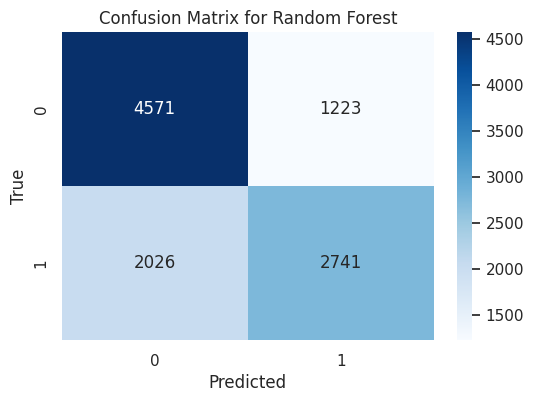

In [ ]:
# Confusion Matrix for Random Forest
rf_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()
rf_predicted_labels = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

cm_rf = confusion_matrix(rf_true_labels, rf_predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

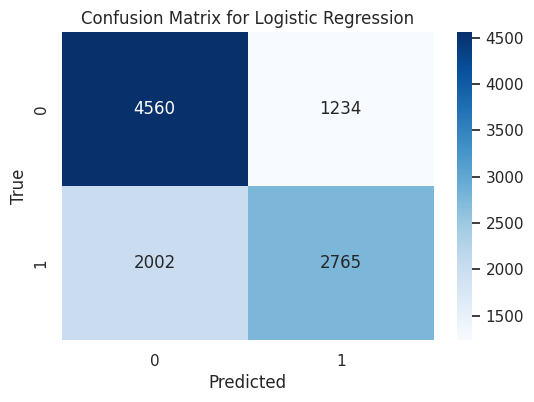

In [ ]:
# Confusion Matrix for Logistic Regression
lr_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()
lr_predicted_labels = lr_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

cm_lr = confusion_matrix(lr_true_labels, lr_predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

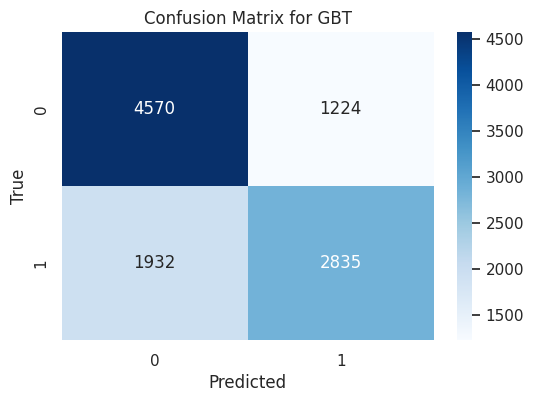

In [ ]:
# Confusion Matrix for GBT
gbt_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()
gbt_predicted_labels = gbt_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

cm_gbt = confusion_matrix(gbt_true_labels, gbt_predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gbt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for GBT')
plt.show()

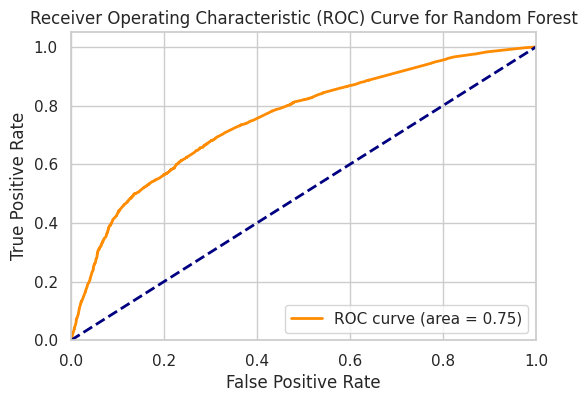

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for Random Forest
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# Extract probability values
rf_predicted_probabilities = rf_predictions.select("probability").rdd.map(lambda x: x[0][1]).collect()
# ROC Curve for Random Forest
rf_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(rf_true_labels, rf_predicted_probabilities)
roc_auc_rf = roc_auc_score(rf_true_labels, rf_predicted_probabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

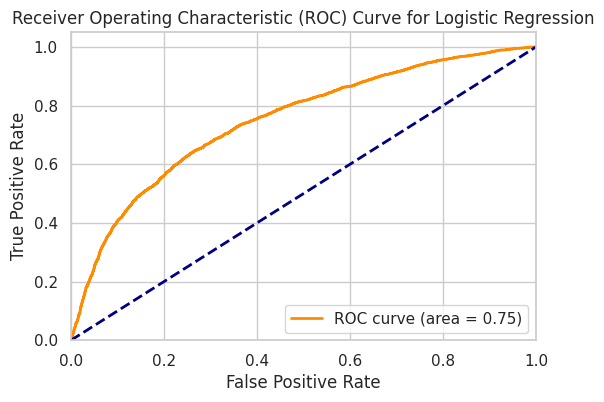

In [ ]:
# Extract probability values for Logistic Regression
lr_predicted_probabilities = lr_predictions.select("probability").rdd.map(lambda x: x[0][1]).collect()

# True labels for Logistic Regression
lr_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(lr_true_labels, lr_predicted_probabilities)
roc_auc_lr = roc_auc_score(lr_true_labels, lr_predicted_probabilities)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


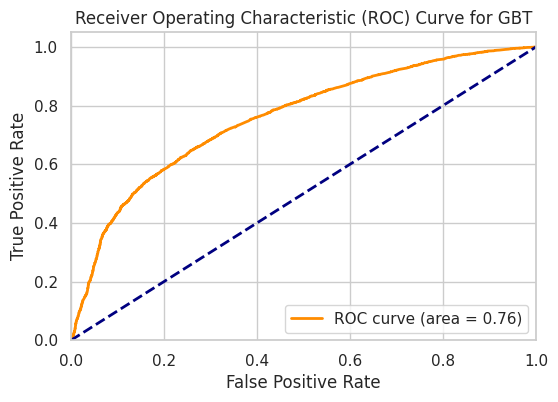

In [ ]:
# Extract probability values for GBT
gbt_predicted_probabilities = gbt_predictions.select("probability").rdd.map(lambda x: x[0][1]).collect()

# True labels for GBT
gbt_true_labels = test_data.select("cardio").rdd.flatMap(lambda x: x).collect()

# Calculate ROC curve and AUC for GBT
fpr_gbt, tpr_gbt, thresholds_gbt = roc_curve(gbt_true_labels, gbt_predicted_probabilities)
roc_auc_gbt = roc_auc_score(gbt_true_labels, gbt_predicted_probabilities)

# Plot ROC curve for GBT
plt.figure(figsize=(6, 4))
plt.plot(fpr_gbt, tpr_gbt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gbt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBT')
plt.legend(loc="lower right")
plt.show()


In [ ]:

# Feature vector assembly
feature_columns = ["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_df = assembler.transform(df)


In [ ]:
# Import necessary libraries
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder.appName("SVMExample").getOrCreate()

# Load your DataFrame (already prepared and assembled with features)
# For example:
# assembled_df = ... (Your DataFrame with "features" and "cardio" columns)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=123)

# Initialize the LinearSVC model
svm = LinearSVC(featuresCol="features", labelCol="cardio")

# Train the SVM model
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the SVM model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction")
f1_score = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})
accuracy = evaluator.evaluate(svm_predictions, {evaluator.metricName: "accuracy"})

# Confusion Matrix
confusion_matrix = svm_predictions.crosstab("cardio", "prediction")
confusion_matrix.show()

# To visualize loss and accuracy curves, you need to collect data during training
# (SVM in PySpark doesn't provide built-in support for this)

# Initialize empty lists to collect loss and accuracy values during training
loss_values = []
accuracy_values = []



+-----------------+----+----+
|cardio_prediction| 0.0| 1.0|
+-----------------+----+----+
|                0|4768|1026|
|                1|2221|2546|
+-----------------+----+----+



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

# Feature vector assembly
feature_columns = ["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)

# Initialize and train a Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio", numTrees=100)
rf_model = rf.fit(train_data)

# Calculate feature importances
feature_importances = rf_model.featureImportances

# Number of top N features to select
N = 5

# Select the top N features based on importance scores
top_features = [
    feature_columns[i]
    for i in feature_importances.indices.argsort()[-N:][::-1]
]

print("Top", N, "Features:", top_features)


Top 5 Features: ['active', 'alco', 'smoke', 'gluc', 'cholesterol']


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC

# Select the top 5 features
selected_features = ['active', 'alco', 'smoke', 'gluc', 'cholesterol']

# Feature vector assembly for selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)

# Initialize and train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="cardio")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Evaluate Logistic Regression model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1-score:", lr_f1)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)

# Initialize and train Multilayer Perceptron model
layers = [len(selected_features), 6, 6, 2]  # Define the layers for the neural network
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="cardio", layers=layers)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)

# Evaluate Multilayer Perceptron model
mlp_accuracy = evaluator.evaluate(mlp_predictions)
mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
mlp_precision = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedPrecision"})
mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})

print("Multilayer Perceptron Accuracy:", mlp_accuracy)
print("Multilayer Perceptron F1-score:", mlp_f1)
print("Multilayer Perceptron Precision:", mlp_precision)
print("Multilayer Perceptron Recall:", mlp_recall)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluate Decision Tree model
dt_accuracy = evaluator.evaluate(dt_predictions)
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier F1-score:", dt_f1)
print("Decision Tree Classifier Precision:", dt_precision)
print("Decision Tree Classifier Recall:", dt_recall)

# Initialize and train SVM (LinearSVC) model
svm = LinearSVC(featuresCol="features", labelCol="cardio")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM model
svm_accuracy = evaluator.evaluate(svm_predictions)
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})

print("SVM (LinearSVC) Accuracy:", svm_accuracy)
print("SVM (LinearSVC) F1-score:", svm_f1)
print("SVM (LinearSVC) Precision:", svm_precision)
print("SVM (LinearSVC) Recall:", svm_recall)


Logistic Regression Accuracy: 0.6109269955496639
Logistic Regression F1-score: 0.5792812560110043
Logistic Regression Precision: 0.618817782665898
Logistic Regression Recall: 0.6109269955496638
Multilayer Perceptron Accuracy: 0.6096013635072436
Multilayer Perceptron F1-score: 0.5764400706448312
Multilayer Perceptron Precision: 0.618108027808147
Multilayer Perceptron Recall: 0.6096013635072437
Decision Tree Classifier Accuracy: 0.6093172994981536
Decision Tree Classifier F1-score: 0.5783044611350094
Decision Tree Classifier Precision: 0.6160721291096347
Decision Tree Classifier Recall: 0.6093172994981536
SVM (LinearSVC) Accuracy: 0.606003219392103
SVM (LinearSVC) F1-score: 0.5461816971767808
SVM (LinearSVC) Precision: 0.6412853796905145
SVM (LinearSVC) Recall: 0.606003219392103


In [ ]:
# Initialize and train Gradient Boosted Tree (GBT) Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="cardio")
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

# Evaluate GBT Classifier
gbt_accuracy = evaluator.evaluate(gbt_predictions)
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
gbt_precision = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})

print("GBT Classifier Accuracy:", gbt_accuracy)
print("GBT Classifier F1-score:", gbt_f1)
print("GBT Classifier Precision:", gbt_precision)
print("GBT Classifier Recall:", gbt_recall)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate Random Forest Classifier
rf_accuracy = evaluator.evaluate(rf_predictions)
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1-score:", rf_f1)
print("Random Forest Classifier Precision:", rf_precision)
print("Random Forest Classifier Recall:", rf_recall)





GBT Classifier Accuracy: 0.6092226114951236
GBT Classifier F1-score: 0.5777353351034535
GBT Classifier Precision: 0.6162886604824421
GBT Classifier Recall: 0.6092226114951236
Random Forest Classifier Accuracy: 0.6090332354890635
Random Forest Classifier F1-score: 0.5787027046780437
Random Forest Classifier Precision: 0.6151835893681827
Random Forest Classifier Recall: 0.6090332354890635


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC

# Define all the feature columns
selected_features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]

# Feature vector assembly for selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)

# Initialize and train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="cardio")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Evaluate Logistic Regression model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1-score:", lr_f1)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)

# Initialize and train Multilayer Perceptron model
layers = [len(selected_features), 6, 6, 2]  # Define the layers for the neural network
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="cardio", layers=layers)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)

# Evaluate Multilayer Perceptron model
mlp_accuracy = evaluator.evaluate(mlp_predictions)
mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
mlp_precision = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedPrecision"})
mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})

print("Multilayer Perceptron Accuracy:", mlp_accuracy)
print("Multilayer Perceptron F1-score:", mlp_f1)
print("Multilayer Perceptron Precision:", mlp_precision)
print("Multilayer Perceptron Recall:", mlp_recall)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluate Decision Tree model
dt_accuracy = evaluator.evaluate(dt_predictions)
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier F1-score:", dt_f1)
print("Decision Tree Classifier Precision:", dt_precision)
print("Decision Tree Classifier Recall:", dt_recall)

# Initialize and train SVM (LinearSVC) model
svm = LinearSVC(featuresCol="features", labelCol="cardio")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM model
svm_accuracy = evaluator.evaluate(svm_predictions)
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})

print("SVM (LinearSVC) Accuracy:", svm_accuracy)
print("SVM (LinearSVC) F1-score:", svm_f1)
print("SVM (LinearSVC) Precision:", svm_precision)
print("SVM (LinearSVC) Recall:", svm_recall)





Logistic Regression Accuracy: 0.6935896221948679
Logistic Regression F1-score: 0.6896601862425249
Logistic Regression Precision: 0.6933573985694604
Logistic Regression Recall: 0.6935896221948679
Multilayer Perceptron Accuracy: 0.5486222895559133
Multilayer Perceptron F1-score: 0.3887150774303835
Multilayer Perceptron Precision: 0.30098641659757236
Multilayer Perceptron Recall: 0.5486222895559133
Decision Tree Classifier Accuracy: 0.7039106145251397
Decision Tree Classifier F1-score: 0.697950138897548
Decision Tree Classifier Precision: 0.7063945816431179
Decision Tree Classifier Recall: 0.7039106145251397
SVM (LinearSVC) Accuracy: 0.6923586781554777
SVM (LinearSVC) F1-score: 0.6847969550828652
SVM (LinearSVC) Precision: 0.6956754758643013
SVM (LinearSVC) Recall: 0.6923586781554777


In [ ]:
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier

# Initialize and train Gradient Boosted Tree (GBT) Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="cardio")
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)


# Evaluate GBT Classifier
gbt_accuracy = evaluator.evaluate(gbt_predictions)
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
gbt_precision = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})

print("GBT Classifier Accuracy:", gbt_accuracy)
print("GBT Classifier F1-score:", gbt_f1)
print("GBT Classifier Precision:", gbt_precision)
print("GBT Classifier Recall:", gbt_recall)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate Random Forest Classifier
rf_accuracy = evaluator.evaluate(rf_predictions)
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1-score:", rf_f1)
print("Random Forest Classifier Precision:", rf_precision)
print("Random Forest Classifier Recall:", rf_recall)




GBT Classifier Accuracy: 0.7008805984281792
GBT Classifier F1-score: 0.6975153882830653
GBT Classifier Precision: 0.7005607454657319
GBT Classifier Recall: 0.7008805984281792
Random Forest Classifier Accuracy: 0.6914117981251775
Random Forest Classifier F1-score: 0.6874320332799989
Random Forest Classifier Precision: 0.6911128358743067
Random Forest Classifier Recall: 0.6914117981251775


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier

# Select the top 5 features
selected_features = ['age', 'cholesterol', 'weight', 'ap_hi']

# Feature vector assembly for selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)

# Initialize and train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="cardio")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Evaluate Logistic Regression model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1-score:", lr_f1)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)

# Initialize and train Multilayer Perceptron model
layers = [len(selected_features), 6, 6, 2]  # Define the layers for the neural network
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="cardio", layers=layers)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)

# Evaluate Multilayer Perceptron model
mlp_accuracy = evaluator.evaluate(mlp_predictions)
mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
mlp_precision = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedPrecision"})
mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})

print("Multilayer Perceptron Accuracy:", mlp_accuracy)
print("Multilayer Perceptron F1-score:", mlp_f1)
print("Multilayer Perceptron Precision:", mlp_precision)
print("Multilayer Perceptron Recall:", mlp_recall)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluate Decision Tree model
dt_accuracy = evaluator.evaluate(dt_predictions)
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier F1-score:", dt_f1)
print("Decision Tree Classifier Precision:", dt_precision)
print("Decision Tree Classifier Recall:", dt_recall)

# Initialize and train SVM (LinearSVC) model
svm = LinearSVC(featuresCol="features", labelCol="cardio")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM model
svm_accuracy = evaluator.evaluate(svm_predictions)
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})

print("SVM (LinearSVC) Accuracy:", svm_accuracy)
print("SVM (LinearSVC) F1-score:", svm_f1)
print("SVM (LinearSVC) Precision:", svm_precision)
print("SVM (LinearSVC) Recall:", svm_recall)
# Initialize and train Gradient Boosted Tree (GBT) Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="cardio")
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

# Evaluate GBT Classifier
gbt_accuracy = evaluator.evaluate(gbt_predictions)
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
gbt_precision = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})

print("GBT Classifier Accuracy:", gbt_accuracy)
print("GBT Classifier F1-score:", gbt_f1)
print("GBT Classifier Precision:", gbt_precision)
print("GBT Classifier Recall:", gbt_recall)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate Random Forest Classifier
rf_accuracy = evaluator.evaluate(rf_predictions)
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1-score:", rf_f1)
print("Random Forest Classifier Precision:", rf_precision)
print("Random Forest Classifier Recall:", rf_recall)






Logistic Regression Accuracy: 0.6907489821039674
Logistic Regression F1-score: 0.686677874308397
Logistic Regression Precision: 0.6904827801661864
Logistic Regression Recall: 0.6907489821039674
Multilayer Perceptron Accuracy: 0.5486222895559133
Multilayer Perceptron F1-score: 0.3887150774303835
Multilayer Perceptron Precision: 0.30098641659757236
Multilayer Perceptron Recall: 0.5486222895559133
Decision Tree Classifier Accuracy: 0.6955780702584983
Decision Tree Classifier F1-score: 0.6937223727616264
Decision Tree Classifier Precision: 0.6944383320357684
Decision Tree Classifier Recall: 0.6955780702584982
SVM (LinearSVC) Accuracy: 0.6904649180948774
SVM (LinearSVC) F1-score: 0.6841783028235265
SVM (LinearSVC) Precision: 0.6921492468940595
SVM (LinearSVC) Recall: 0.6904649180948774
GBT Classifier Accuracy: 0.6952940062494082
GBT Classifier F1-score: 0.6941248069240744
GBT Classifier Precision: 0.6941956068463221
GBT Classifier Recall: 0.6952940062494082
Random Forest Classifier Accuracy

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier

# Select the top 5 features
selected_features =[ "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active" , "age_in_years"]

# Feature vector assembly for selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)

# Initialize and train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="cardio")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Evaluate Logistic Regression model
evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1-score:", lr_f1)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)

# Initialize and train Multilayer Perceptron model
layers = [len(selected_features), 6, 6, 2]  # Define the layers for the neural network
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="cardio", layers=layers)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)

# Evaluate Multilayer Perceptron model
mlp_accuracy = evaluator.evaluate(mlp_predictions)
mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
mlp_precision = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedPrecision"})
mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})

print("Multilayer Perceptron Accuracy:", mlp_accuracy)
print("Multilayer Perceptron F1-score:", mlp_f1)
print("Multilayer Perceptron Precision:", mlp_precision)
print("Multilayer Perceptron Recall:", mlp_recall)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Evaluate Decision Tree model
dt_accuracy = evaluator.evaluate(dt_predictions)
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier F1-score:", dt_f1)
print("Decision Tree Classifier Precision:", dt_precision)
print("Decision Tree Classifier Recall:", dt_recall)

# Initialize and train SVM (LinearSVC) model
svm = LinearSVC(featuresCol="features", labelCol="cardio")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM model
svm_accuracy = evaluator.evaluate(svm_predictions)
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})

print("SVM (LinearSVC) Accuracy:", svm_accuracy)
print("SVM (LinearSVC) F1-score:", svm_f1)
print("SVM (LinearSVC) Precision:", svm_precision)
print("SVM (LinearSVC) Recall:", svm_recall)
# Initialize and train Gradient Boosted Tree (GBT) Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="cardio")
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
# Evaluate GBT Classifier
gbt_accuracy = evaluator.evaluate(gbt_predictions)
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
gbt_precision = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})

print("GBT Classifier Accuracy:", gbt_accuracy)
print("GBT Classifier F1-score:", gbt_f1)
print("GBT Classifier Precision:", gbt_precision)
print("GBT Classifier Recall:", gbt_recall)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate Random Forest Classifier
rf_accuracy = evaluator.evaluate(rf_predictions)
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1-score:", rf_f1)
print("Random Forest Classifier Precision:", rf_precision)
print("Random Forest Classifier Recall:", rf_recall)






Logistic Regression Accuracy: 0.694157750213048
Logistic Regression F1-score: 0.690235599988676
Logistic Regression Precision: 0.6939470206214182
Logistic Regression Recall: 0.694157750213048
Multilayer Perceptron Accuracy: 0.6743679575797746
Multilayer Perceptron F1-score: 0.6714147820205267
Multilayer Perceptron Precision: 0.6729659086777677
Multilayer Perceptron Recall: 0.6743679575797746
Decision Tree Classifier Accuracy: 0.7027743584887794
Decision Tree Classifier F1-score: 0.6989985468620405
Decision Tree Classifier Precision: 0.7028591880938863
Decision Tree Classifier Recall: 0.7027743584887796
SVM (LinearSVC) Accuracy: 0.6918852381403277
SVM (LinearSVC) F1-score: 0.6845031095849614
SVM (LinearSVC) Precision: 0.694933472913654
SVM (LinearSVC) Recall: 0.6918852381403277
GBT Classifier Accuracy: 0.7005965344190891
GBT Classifier F1-score: 0.6970275195093214
GBT Classifier Precision: 0.7004151541856434
GBT Classifier Recall: 0.7005965344190891
Random Forest Classifier Accuracy: 0.